In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import utilities

In [2]:
# Set a fixed rondom seed number
from numpy.random import seed
seed(1)

In [3]:
# Import data into the workspace
data = pd.read_csv('FB_stock_history.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


# Basic Statistics of data

In [4]:
# Display the number of records and features for the data
print("Number of records: " , data.shape[0])
print("Number of features: " , data.shape[1])

Number of records:  2359
Number of features:  8


In [5]:
# Display the basic info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2359 non-null   object 
 1   Open          2359 non-null   float64
 2   High          2359 non-null   float64
 3   Low           2359 non-null   float64
 4   Close         2359 non-null   float64
 5   Volume        2359 non-null   int64  
 6   Dividends     2359 non-null   int64  
 7   Stock Splits  2359 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 147.6+ KB


In [6]:
# Display the basic statistic for the data
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03,2359.0,2359.0
mean,139.606969,141.234324,137.958605,139.656876,3.095630e+07,0.0,0.0
std,84.490691,85.465048,83.566847,84.565640,2.778137e+07,0.0,0.0
min,18.080000,18.270000,17.549999,17.730000,5.913100e+06,0.0,0.0
25%,74.935001,75.565002,74.020000,74.855000,1.564190e+07,0.0,0.0
50%,130.979996,132.259995,129.770004,131.050003,2.220590e+07,0.0,0.0
75%,184.914993,186.830002,183.419998,185.345001,3.597605e+07,0.0,0.0
max,381.679993,384.329987,378.809998,382.179993,5.735764e+08,0.0,0.0


In [7]:
# Display the range of time for this financial data
print("Range of time:  from " + data['Date'].min() + " to "+ data['Date'].max())

Range of time:  from 2012-05-18 to 2021-10-01


In [8]:
# Set the 'Date' as index
data = data[pd.to_datetime(data['Date'])==data['Date']]
data.index = pd.to_datetime(data['Date'])
data = data.drop(['Date'], axis = 1)

In [9]:
# Define year and month for the data
data[['year', 'month']] = [x.timetuple()[:2] for x in data.index.tolist()]

In [10]:
# Display the first 5 rows of the data
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month
Date,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0,2012,5
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0,2012,5
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0,2012,5
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0,2012,5
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0,2012,5


In [11]:
# Define style to plot the time series graph for each feature (Open, High, Low and Close)
sns.set(style="darkgrid")

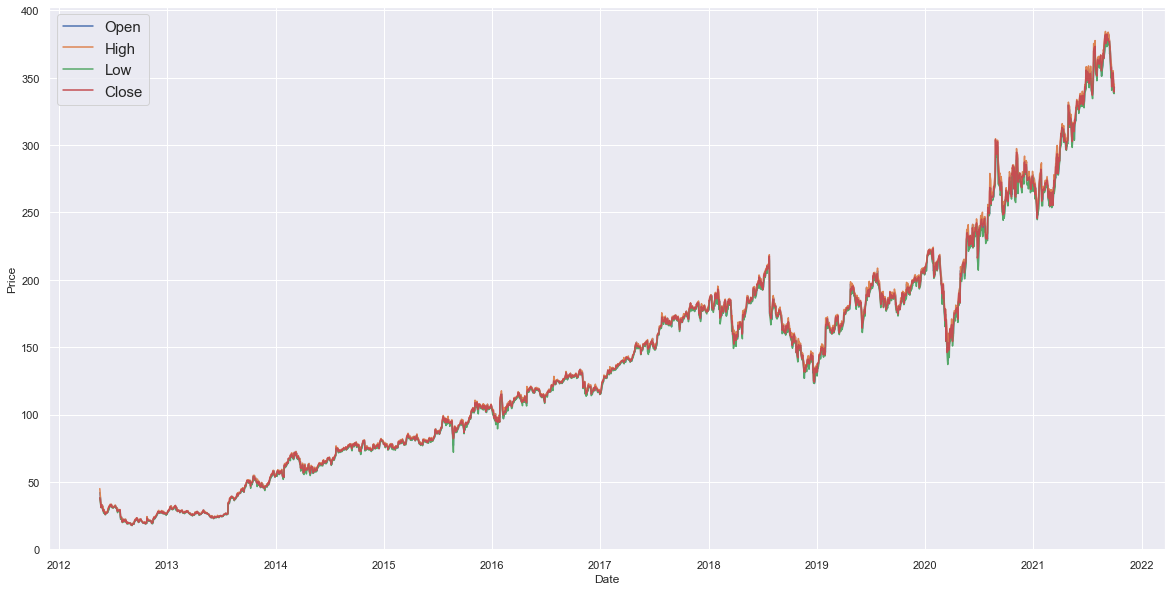

In [12]:
# Plot from day to day manner
utilities.price_plot(data)

In [13]:
# Filter data by month
month_data = data.groupby(pd.Grouper(freq='M')).sum()

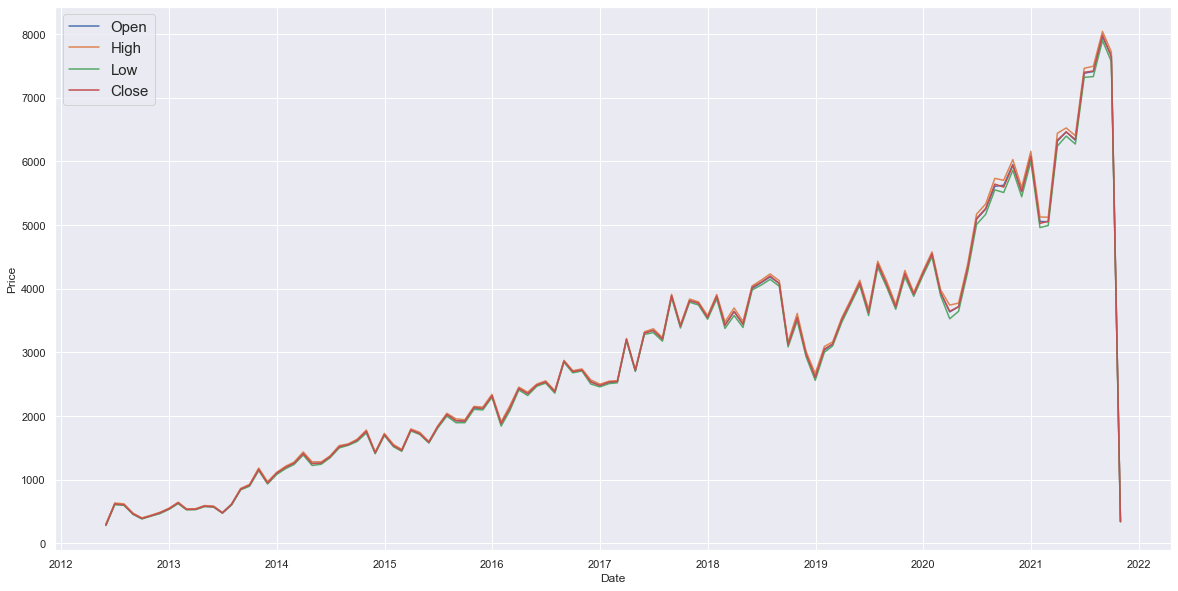

In [14]:
# Display the price plot in monthly manner
utilities.price_plot(month_data)

In [15]:
# Filter data by year
year_data = data.groupby(pd.Grouper(freq='A')).sum()

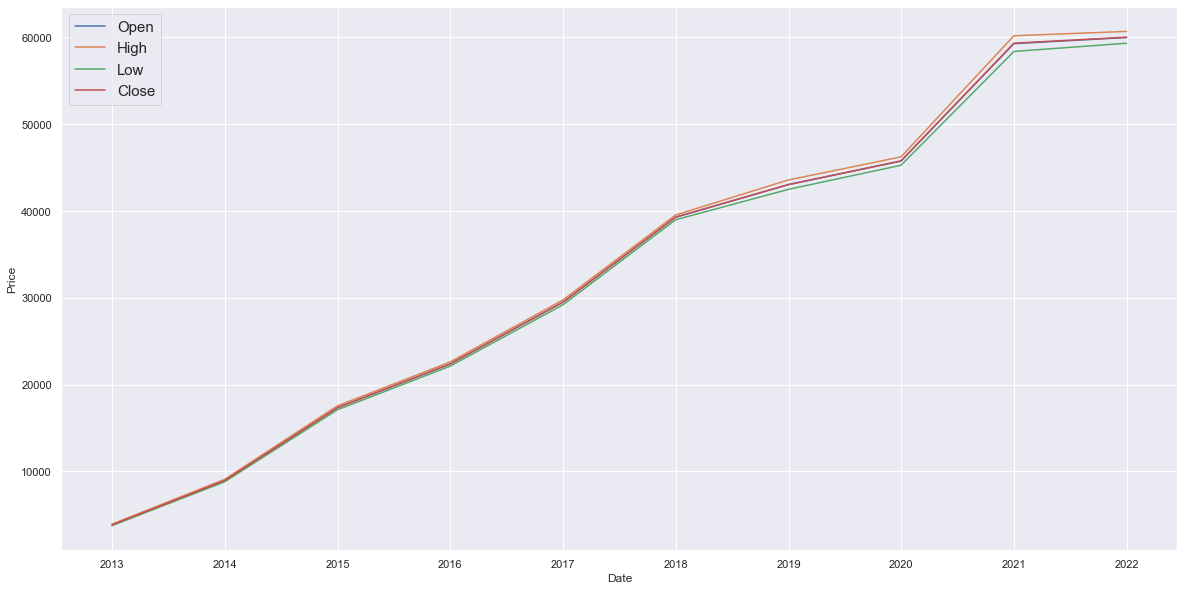

In [16]:
# Display the price plot in yearly manner
utilities.price_plot(year_data)

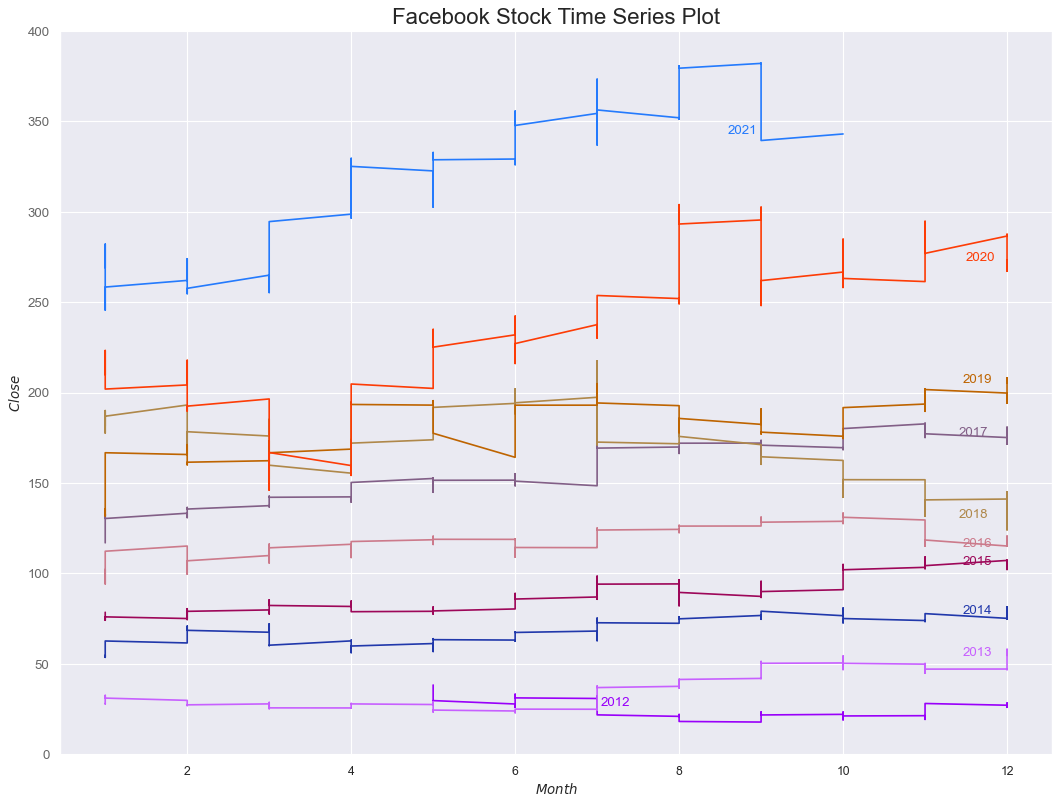

In [17]:
# Prepare data
years = data['year'].unique()

# Prepare Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Plot the data
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    plt.plot('month', 'Close', data=data.loc[data.year==y, :], color=mycolors[i], label=y)
    plt.text(data.loc[data.year==y, :].shape[0]/22, data.loc[data.year==y, 'Close'][-1:].values[0], y, color=mycolors[i])
    
plt.gca().set(ylabel='$Close$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Facebook Stock Time Series Plot", fontsize=20)
plt.show()

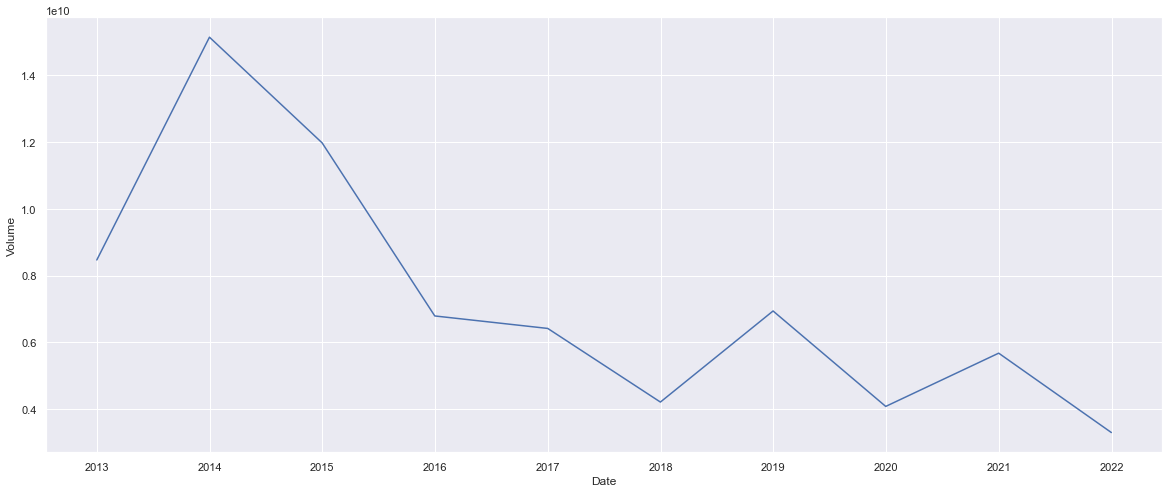

In [18]:
# Display the stock availability (Volume) in yearly manner
fig, ax = plt.subplots(figsize = (20,8))
sns.lineplot(x=year_data.index, y='Volume', data=year_data)
plt.show()

# Data Cleaning

In [19]:
# Remove unwated feature from the data (Dividends and Stock Splits with only 0)
data = data.drop(['Dividends', 'Stock Splits'], axis = 1)
data.head()

,Open,High,Low,Close,Volume,year,month
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,2012,5
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,2012,5
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,2012,5
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,2012,5
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,2012,5


In [20]:
# Check for null value in the dataset
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
year      0
month     0
dtype: int64

In [21]:
# Check for duplicated data
print("Duplicated data: ", data.duplicated().sum())

Duplicated data:  0


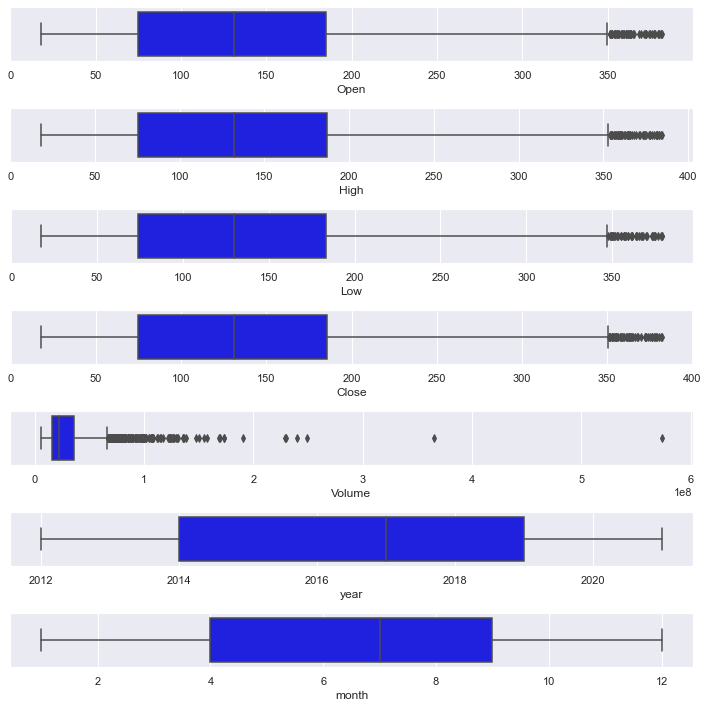

In [22]:
# Display the boxplot for every feature
utilities.boxplot(data,"blue")

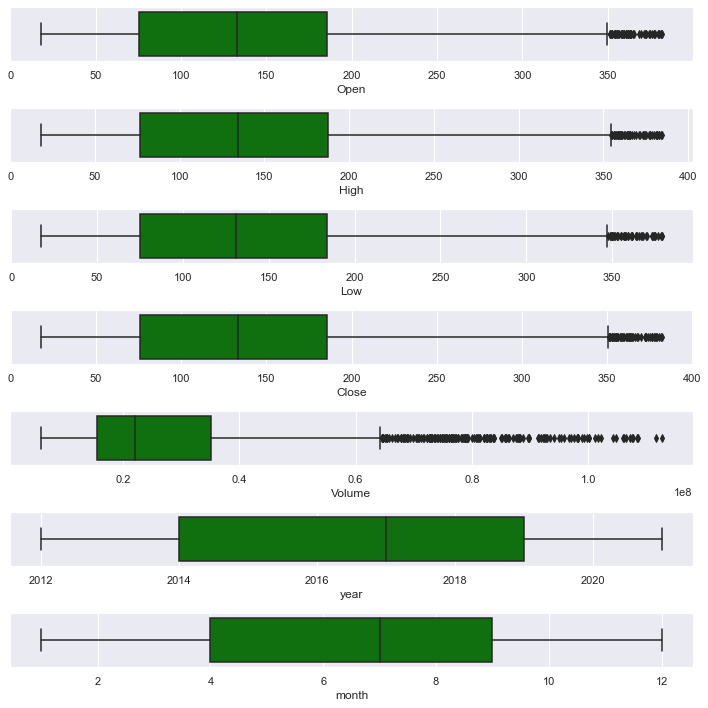

In [23]:
# Remove outlier using zscore
new_data = data[(np.abs(stats.zscore(data['Volume'])) < 3)]

utilities.boxplot(new_data,"green")

<AxesSubplot:>

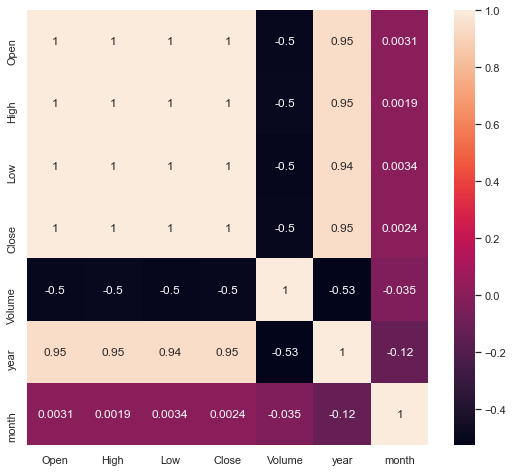

In [24]:
# Measure correlations for each pair of feature
corr = new_data.corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True)

In [25]:
# Create a OLS statistics test to get the p value with respect to 'Open' feature
X = new_data[['High', 'Low', 'Close', 'Volume']]
Y = new_data['Open']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

pval_d = {}
for i in X.columns.tolist():
    pval_d[f'{i}'] = model.pvalues[i]

df_pvalue= pd.DataFrame(pval_d.items(), columns=['Variable', 'p Value']).sort_values(by = 'p Value').reset_index(drop=True)
display(df_pvalue)

,Variable,p Value
0,High,0.000000e+00
1,Low,0.000000e+00
2,Close,7.168129e-188
3,const,5.798654e-01
4,Volume,9.758512e-01


In [26]:
# Remove the feature that is less correlated to the 'Open' price
new_data = new_data.drop(['Volume', 'year', 'month'], axis = 1)

In [27]:
# Dispaly the shape of the new data
new_data.shape

(2324, 4)

In [28]:
# Set the date as a variable to plot the data
date = new_data.index

# SVM

## Method 1 (Scale -> Split -> Train)

In [29]:
# Normalize the price (High, Low and Close)
scaler_X = StandardScaler()
scaled_X = scaler_X.fit_transform(new_data[['High','Low','Close']])

df_price = pd.DataFrame(scaled_X, columns = ['High','Low','Close'])
df_open = pd.DataFrame(new_data, columns = ['Open'])

combined_data = pd.concat([df_open.reset_index(drop=True),df_price.reset_index(drop=True)], axis=1)
combined_data.columns = new_data.columns
combined_data.index = new_data.index
combined_data.describe()

,Open,High,Low,Close
count,2324.000000,2.324000e+03,2.324000e+03,2.324000e+03
mean,140.932466,7.127594e-16,4.513506e-16,-2.789889e-16
std,84.293378,1.000215e+00,1.000215e+00,1.000215e+00
min,18.080000,-1.457912e+00,-1.460682e+00,-1.461319e+00
25%,75.574997,-7.742969e-01,-7.739055e-01,-7.733823e-01
50%,133.035004,-9.771994e-02,-9.660790e-02,-9.214390e-02
75%,185.657501,5.300923e-01,5.351846e-01,5.324828e-01
max,381.679993,2.835726e+00,2.873975e+00,2.859553e+00


In [30]:
# Setting training data (from first date until end of 2018)
SVM_training_data = combined_data.loc[:'2019-01-01']
date_train = date[:len(SVM_training_data)]

SVM_X_train = SVM_training_data.drop(['Open'], axis = 1)
SVM_y_train = SVM_training_data['Open']

In [31]:
# Convert the training data into NumPy array
SVM_X_train, SVM_y_train = SVM_X_train.to_numpy(), SVM_y_train.to_numpy()

In [32]:
# Setting testing data (from 2019 to 2021)
SVM_testing_data = combined_data.loc['2019-01-01':]
date_test = date[len(SVM_training_data):]

SVM_X_test = SVM_testing_data.drop(['Open'], axis = 1)
SVM_y_test = SVM_testing_data['Open']

In [33]:
# Convert the testing data into NumPy array
SVM_X_test, SVM_y_test = SVM_X_test.to_numpy(), SVM_y_test.to_numpy()

In [34]:
# Run the experiments 10 times and visualise the RMSE result
for i in range(10):
    print("Experiment ", i+1)
    SVM_pred_train, SVM_pred_test, rmse_SVM_train_1, rmse_SVM_test_1 = \
    utilities.SVM_fit_model(SVM_X_train, SVM_y_train, SVM_X_test, SVM_y_test)
    print(100*"=")

Experiment  1
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  2
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  3
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  4
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  5
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  6
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  7
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  8
Root Mean Square Error on t

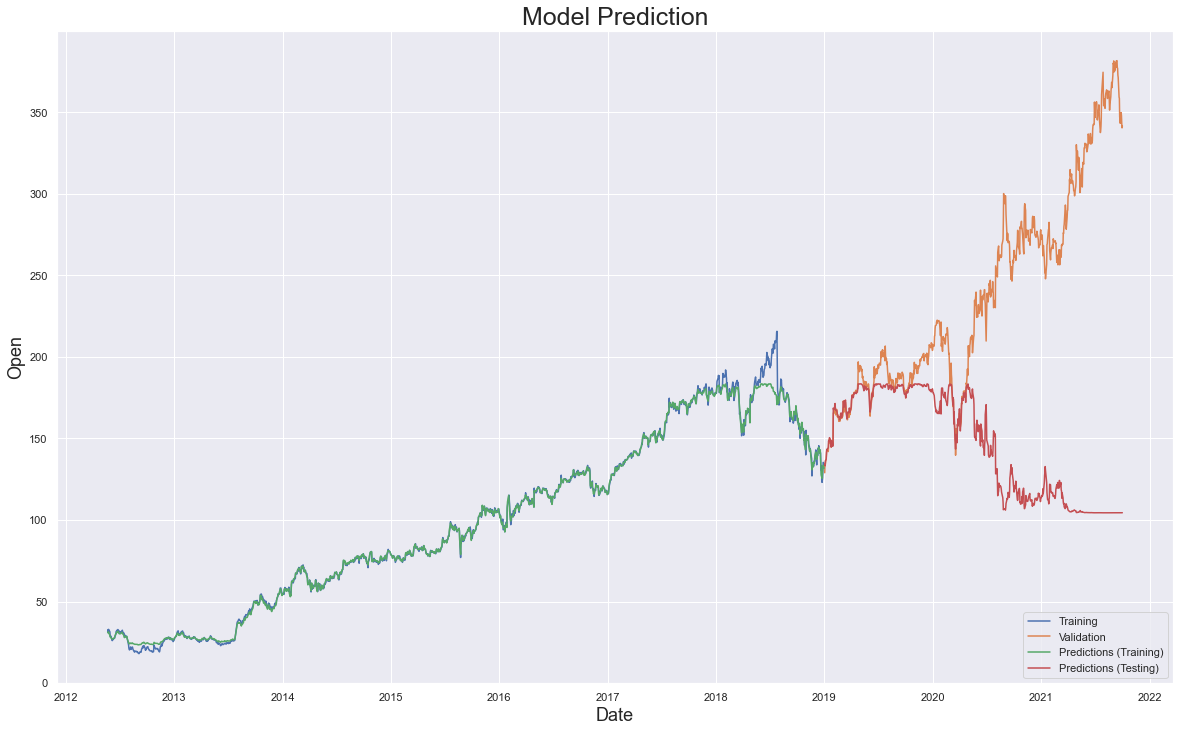

In [35]:
# Plot and visualize data
utilities.visualize(SVM_y_train, SVM_y_test, SVM_pred_train, SVM_pred_test, date_train, date_test)

## Method 2 (Split -> Scale -> Train) (More related to real world application)

In [36]:
# Display the data
new_data.head()

,Open,High,Low,Close
Date,,,,
2012-05-22,32.610001,33.590000,30.940001,31.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999
2012-05-25,32.900002,32.950001,31.110001,31.910000
2012-05-29,31.480000,31.690001,28.650000,28.840000


In [37]:
# Set the scaler for training data
scaler_X_SVM_2 = StandardScaler()

In [38]:
# Split data before scaling (Method 2)
SVM_training_data_no_scaled = new_data.loc[:'2019-01-01']

In [39]:
# Split data before scaling (Method 2)
SVM_X_train_scaled = SVM_training_data_no_scaled.drop(['Open'], axis = 1)
SVM_y_train_scaled = SVM_training_data_no_scaled['Open'].to_numpy()

SVM_X_train_scaled = scaler_X_SVM_2.fit_transform(SVM_X_train_scaled.to_numpy())

In [40]:
# Split data before scaling (Method 2)
SVM_testing_data_no_scaled = new_data.loc['2019-01-01':]

In [41]:
# Split data before scaling (Method 2)
SVM_X_test_scaled = SVM_testing_data_no_scaled.drop(['Open'], axis = 1)
SVM_y_test_scaled = SVM_testing_data_no_scaled['Open'].to_numpy()

SVM_X_test_scaled = scaler_X_SVM_2.transform(SVM_X_test_scaled.to_numpy())

In [42]:
# Run the experiments 10 times and visualise the RMSE result
for i in range(10):
    print("Experiment ", i+1)
    SVM_pred_train_2, SVM_pred_test_2, rmse_SVM_train_2, rmse_SVM_test_2 = \
    utilities.SVM_fit_model(SVM_X_train, SVM_y_train, SVM_X_test, SVM_y_test)
    print(100*"=")

Experiment  1
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  2
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  3
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  4
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  5
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  6
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  7
Root Mean Square Error on training data:   3.5316730392800526
Root Mean Square Error on testing data:   129.94641341958328
Experiment  8
Root Mean Square Error on t

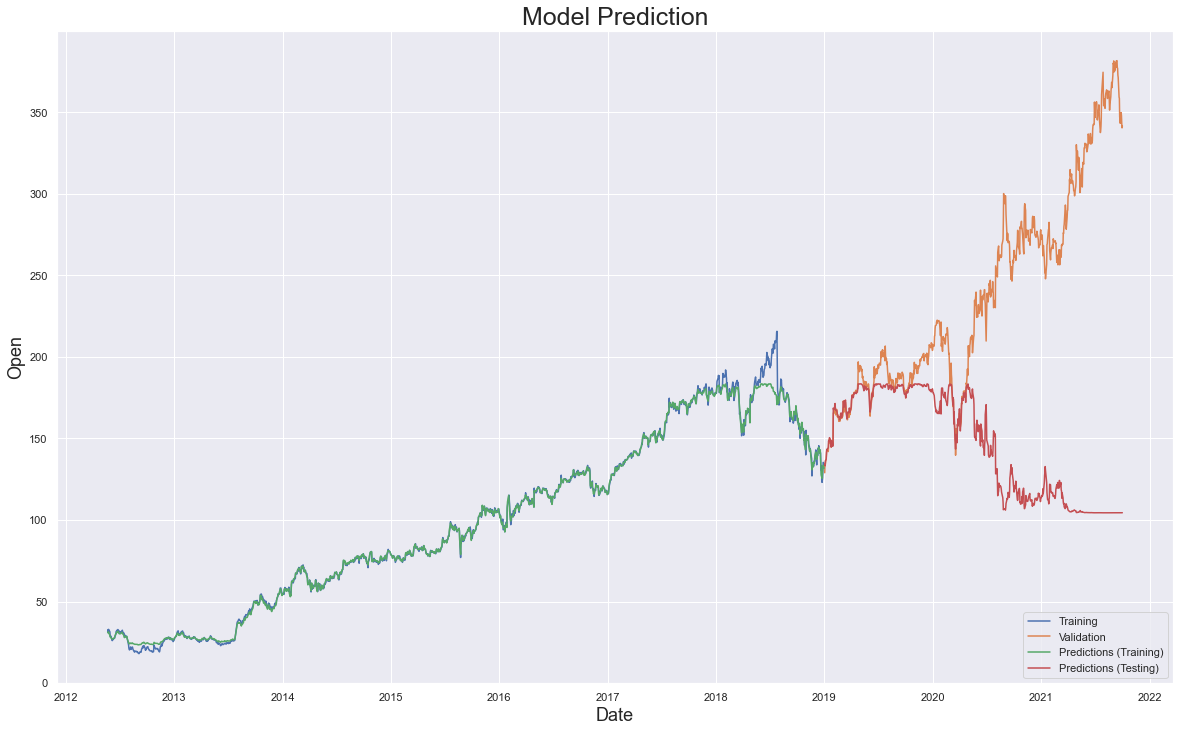

In [43]:
# Plot and visualize data
utilities.visualize(SVM_y_train_scaled, SVM_y_test_scaled, SVM_pred_train_2, SVM_pred_test_2, date_train, date_test)

# LSTM

## Method 1 (Scale -> Split -> Train)

In [44]:
# Normalize the price (High, Low and Close)
scaler_X = StandardScaler()
scaled_X = scaler_X.fit_transform(new_data[['High','Low','Close']])

df_price = pd.DataFrame(scaled_X, columns = ['High','Low','Close'])
df_open = new_data['Open']

combined_data = pd.concat([df_open.reset_index(drop=True),df_price.reset_index(drop=True)], axis=1)
combined_data.columns = new_data.columns
combined_data.index = new_data.index
combined_data.describe()

,Open,High,Low,Close
count,2324.000000,2.324000e+03,2.324000e+03,2.324000e+03
mean,140.932466,7.127594e-16,4.513506e-16,-2.789889e-16
std,84.293378,1.000215e+00,1.000215e+00,1.000215e+00
min,18.080000,-1.457912e+00,-1.460682e+00,-1.461319e+00
25%,75.574997,-7.742969e-01,-7.739055e-01,-7.733823e-01
50%,133.035004,-9.771994e-02,-9.660790e-02,-9.214390e-02
75%,185.657501,5.300923e-01,5.351846e-01,5.324828e-01
max,381.679993,2.835726e+00,2.873975e+00,2.859553e+00


In [45]:
# Setting training data (from first date until end of 2018)
LSTM_training_data = combined_data.loc[:'2019-01-01']

LSTM_X_train = LSTM_training_data.drop(['Open'], axis = 1)
LSTM_y_train = LSTM_training_data['Open']

In [46]:
# Convert data into numpy array
LSTM_X_train, LSTM_y_train = np.array(LSTM_X_train), np.array(LSTM_y_train)

In [47]:
# Reshape the data
LSTM_X_train = np.reshape(LSTM_X_train, (LSTM_X_train.shape[0], LSTM_X_train.shape[1], 1))

In [48]:
# Setting testing data (from 2019 to 2021)
LSTM_testing_data = combined_data.loc['2019-01-01':]

LSTM_X_test = LSTM_testing_data.drop(['Open'], axis = 1)
LSTM_y_test = LSTM_testing_data['Open']

In [49]:
# Convert data into numpy array
LSTM_X_test, LSTM_y_test = np.array(LSTM_X_test), np.array(LSTM_y_test)

In [50]:
# Reshape the data
LSTM_X_test = np.reshape(LSTM_X_test, (LSTM_X_test.shape[0], LSTM_X_test.shape[1], 1))

In [51]:
# Run the experiments 10 times and save the best results
LSTM_best_1 = {"LSTM_pred_train":[],"LSTM_pred_test":[],"rmse_LSTM_train_1":[],"rmse_LSTM_test_1":[]}
for i in range(10):
    print("Experiment ", i+1)
    LSTM_pred_train, LSTM_pred_test, rmse_LSTM_train_1, rmse_LSTM_test_1 = \
    utilities.LSTM_fit_model(LSTM_X_train, LSTM_y_train, LSTM_X_test, LSTM_y_test)
    print(100*"=")
    LSTM_best_1["LSTM_pred_train"].append(LSTM_pred_train)
    LSTM_best_1["LSTM_pred_test"].append(LSTM_pred_test)
    LSTM_best_1["rmse_LSTM_train_1"].append(rmse_LSTM_train_1)
    LSTM_best_1["rmse_LSTM_test_1"].append(rmse_LSTM_test_1)

Experiment  1
Root Mean Square Error on training data:   1.0185149854516187
Root Mean Square Error on testing data:   13.10862100583981
Experiment  2
Root Mean Square Error on training data:   1.039533053400011
Root Mean Square Error on testing data:   18.68772820940778
Experiment  3
Root Mean Square Error on training data:   0.983940149439926
Root Mean Square Error on testing data:   15.087433954951141
Experiment  4
Root Mean Square Error on training data:   1.0033167612478124
Root Mean Square Error on testing data:   25.032115282820094
Experiment  5
Root Mean Square Error on training data:   0.9912903597637187
Root Mean Square Error on testing data:   25.233943313193006
Experiment  6
Root Mean Square Error on training data:   1.0206393669814242
Root Mean Square Error on testing data:   34.60158072578094
Experiment  7
Root Mean Square Error on training data:   0.9753769637733566
Root Mean Square Error on testing data:   38.478643582116966
Experiment  8
Root Mean Square Error on traini

In [52]:
# Select the minimum test RMSE value and corresponding train RMSE value
min_test_LSTM_rmse_1 = min(LSTM_best_1["rmse_LSTM_test_1"])
min_test_LSTM_rmse_index_1 = LSTM_best_1["rmse_LSTM_test_1"].index(min_test_LSTM_rmse_1)
min_train_LSTM_rmse_1 = LSTM_best_1["rmse_LSTM_train_1"][min_test_LSTM_rmse_index_1]

print("Minimum test RMSE value:", min_test_LSTM_rmse_1)
print("Corresponding train RMSE value:", min_train_LSTM_rmse_1)

# Select the pred_train and _pred_test for the minimum test RMSE value
LSTM_pred_train = LSTM_best_1["LSTM_pred_train"][min_test_LSTM_rmse_index_1]
LSTM_pred_test = LSTM_best_1["LSTM_pred_test"][min_test_LSTM_rmse_index_1]

Minimum test RMSE value: 13.10862100583981
Corresponding train RMSE value: 1.0185149854516187


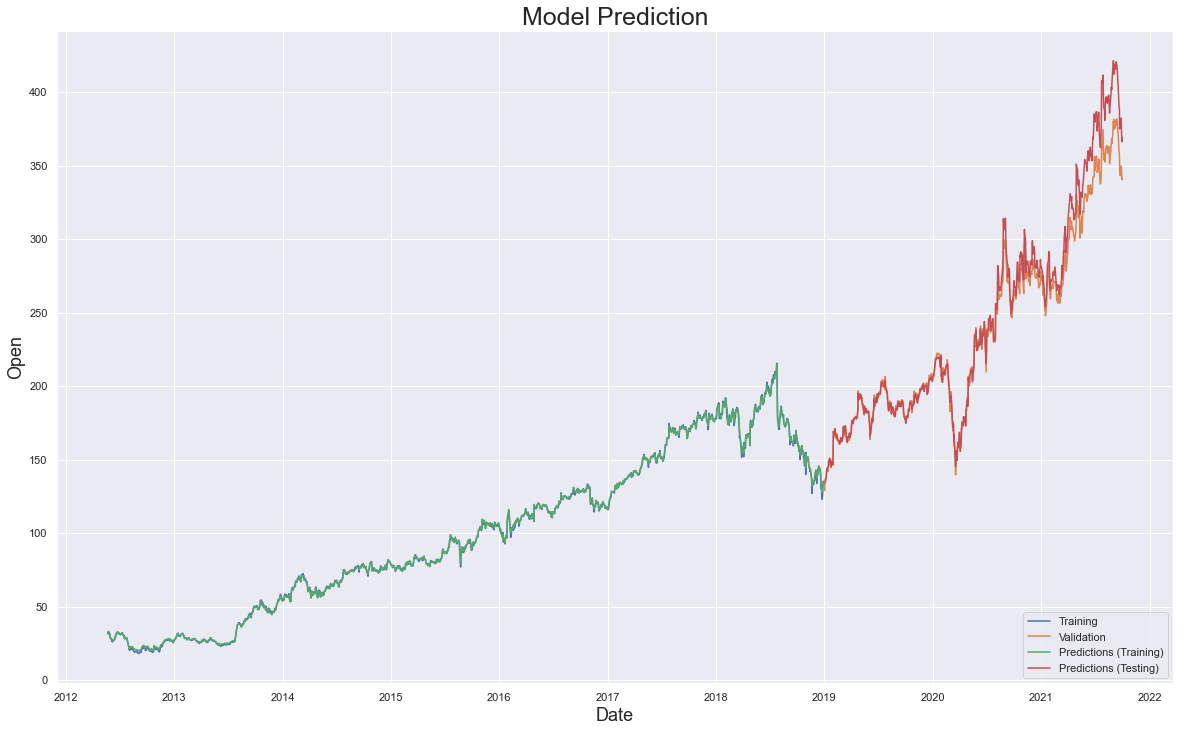

In [53]:
# Plot and visualize data
utilities.visualize(LSTM_y_train, LSTM_y_test, LSTM_pred_train, LSTM_pred_test, date_train, date_test)

## Method 2 (Split -> Scale -> Train) (More related to real world application)

In [54]:
# Display the data
new_data.head()

,Open,High,Low,Close
Date,,,,
2012-05-22,32.610001,33.590000,30.940001,31.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999
2012-05-25,32.900002,32.950001,31.110001,31.910000
2012-05-29,31.480000,31.690001,28.650000,28.840000


In [55]:
# Set the scaler for training data
scaler_X_LSTM_2 = StandardScaler()

In [56]:
# Split data before scaling (Method 2)
LSTM_training_data_no_scaled = new_data.loc[:'2019-01-01']

In [57]:
# Split data before scaling (Method 2)
LSTM_X_train_scaled = LSTM_training_data_no_scaled.drop(['Open'], axis = 1)
LSTM_y_train_scaled = LSTM_training_data_no_scaled['Open'].to_numpy()

LSTM_X_train_scaled = scaler_X_LSTM_2.fit_transform(LSTM_X_train_scaled.to_numpy())

# Reshape the data
LSTM_X_train_scaled = np.reshape(LSTM_X_train_scaled, (LSTM_X_train_scaled.shape[0], LSTM_X_train_scaled.shape[1], 1))

In [58]:
# Split data before scaling (Method 2)
LSTM_testing_data_no_scaled = new_data.loc['2019-01-01':]

In [59]:
# Split data before scaling (Method 2)
LSTM_X_test_scaled = LSTM_testing_data_no_scaled.drop(['Open'], axis = 1)
LSTM_y_test_scaled = LSTM_testing_data_no_scaled['Open'].to_numpy()

LSTM_X_test_scaled = scaler_X_LSTM_2.transform(LSTM_X_test_scaled.to_numpy())

# Reshape the data
LSTM_X_test_scaled = np.reshape(LSTM_X_test_scaled, (LSTM_X_test_scaled.shape[0], LSTM_X_test_scaled.shape[1], 1))

In [60]:
# Run the experiments 10 times and save the best results
LSTM_best_2 = {"LSTM_pred_train_2":[],"LSTM_pred_test_2":[],"rmse_LSTM_train_2":[],"rmse_LSTM_test_2":[]}
for i in range(10):
    print("Experiment ", i+1)
    LSTM_pred_train_2, LSTM_pred_test_2, rmse_LSTM_train_2, rmse_LSTM_test_2 = \
    utilities.LSTM_fit_model(LSTM_X_train, LSTM_y_train, LSTM_X_test, LSTM_y_test)
    print(100*"=")
    LSTM_best_2["LSTM_pred_train_2"].append(LSTM_pred_train_2)
    LSTM_best_2["LSTM_pred_test_2"].append(LSTM_pred_test_2)
    LSTM_best_2["rmse_LSTM_train_2"].append(rmse_LSTM_train_2)
    LSTM_best_2["rmse_LSTM_test_2"].append(rmse_LSTM_test_2)

Experiment  1
Root Mean Square Error on training data:   0.9527772497384799
Root Mean Square Error on testing data:   19.007583556678416
Experiment  2
Root Mean Square Error on training data:   0.9909998180856385
Root Mean Square Error on testing data:   63.126460239284434
Experiment  3
Root Mean Square Error on training data:   0.9689016826744249
Root Mean Square Error on testing data:   28.884730789429746
Experiment  4
Root Mean Square Error on training data:   0.9888830076885727
Root Mean Square Error on testing data:   21.29143701375362
Experiment  5
Root Mean Square Error on training data:   0.9805355439626857
Root Mean Square Error on testing data:   27.956757890726927
Experiment  6
Root Mean Square Error on training data:   0.9850768162501512
Root Mean Square Error on testing data:   38.16074148243181
Experiment  7
Root Mean Square Error on training data:   0.9592217739904397
Root Mean Square Error on testing data:   22.135026412463926
Experiment  8
Root Mean Square Error on tra

In [61]:
# Select the minimum test RMSE value and corresponding train RMSE value
min_test_LSTM_rmse_2 = min(LSTM_best_2["rmse_LSTM_test_2"])
min_test_LSTM_rmse_index_2 = LSTM_best_2["rmse_LSTM_test_2"].index(min_test_LSTM_rmse_2)
min_train_LSTM_rmse_2 = LSTM_best_2["rmse_LSTM_train_2"][min_test_LSTM_rmse_index_2]

print("Minimum test RMSE value:", min_test_LSTM_rmse_2)
print("Corresponding train RMSE value:", min_train_LSTM_rmse_2)

# Select the pred_train and _pred_test for the minimum test RMSE value
LSTM_pred_train_2 = LSTM_best_2["LSTM_pred_train_2"][min_test_LSTM_rmse_index_2]
LSTM_pred_test_2 = LSTM_best_2["LSTM_pred_test_2"][min_test_LSTM_rmse_index_2]

Minimum test RMSE value: 19.007583556678416
Corresponding train RMSE value: 0.9527772497384799


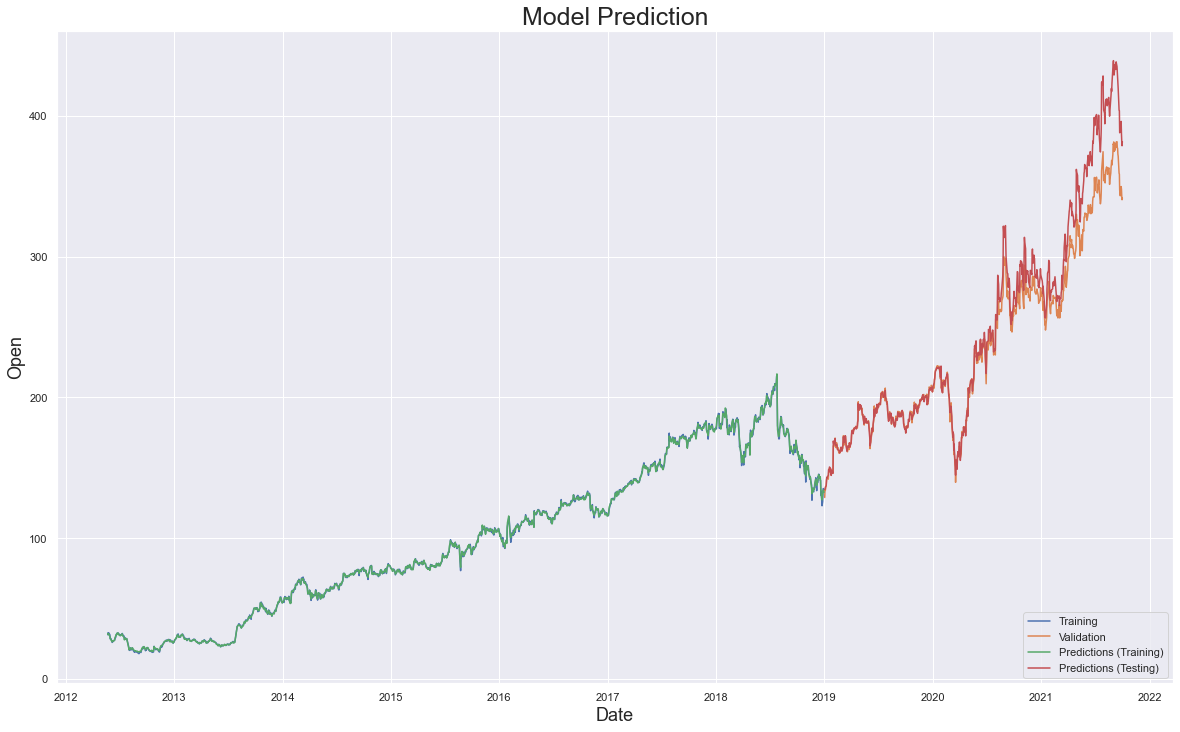

In [62]:
# Plot and visualize data
utilities.visualize(LSTM_y_train_scaled, LSTM_y_test_scaled, LSTM_pred_train_2, LSTM_pred_test_2, date_train, date_test)

## Evaluation

In [63]:
# Display the best training result
best_training_performance, name, method = \
utilities.best_training_performance(rmse_SVM_train_1, rmse_SVM_train_2, min_train_LSTM_rmse_1, min_train_LSTM_rmse_2)
print("Best performance for training is the", name, "model with method", method, ": ", best_training_performance)

Best performance for training is the LSTM model with method 2 :  0.9527772497384799


In [64]:
# Display the best testing result
best_testing_performance, name, method = \
utilities.best_testing_performance(rmse_SVM_test_1, rmse_SVM_test_2, min_test_LSTM_rmse_1, min_test_LSTM_rmse_2)
print("Best performance for testing is the", name, "model with method", method, ": ", best_testing_performance)

Best performance for testing is the LSTM model with method 1 :  13.10862100583981
